<a href="https://colab.research.google.com/github/coderaadi1/ML_using_tensorflow/blob/main/knn_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [5]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

In [6]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier())

In [7]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [8]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.883 (0.035)


In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


In [10]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
	return X, y

In [11]:
def get_models():
	models = dict()
	# evaluate k values from 1 to 20
	for i in range(1,21):
		# define the base model
		base = KNeighborsClassifier(n_neighbors=i)
		# define the ensemble model
		models[str(i)] = BaggingClassifier(base_estimator=base)
	return models

In [12]:
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

>1 0.882 (0.030)
>2 0.883 (0.030)
>3 0.885 (0.035)
>4 0.882 (0.042)
>5 0.884 (0.040)
>6 0.886 (0.038)
>7 0.880 (0.035)
>8 0.875 (0.033)
>9 0.872 (0.037)
>10 0.872 (0.038)
>11 0.871 (0.035)
>12 0.872 (0.038)
>13 0.873 (0.036)
>14 0.874 (0.034)
>15 0.872 (0.035)
>16 0.871 (0.032)
>17 0.876 (0.031)
>18 0.876 (0.033)
>19 0.872 (0.036)
>20 0.876 (0.036)


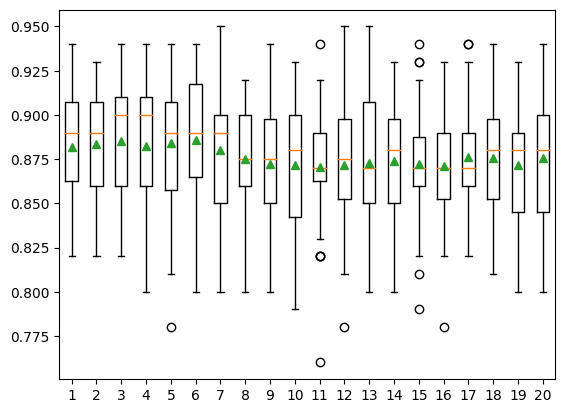

In [20]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()